# SAP Cloud ALM Project and Task API Test and Demo

This notebook contains examples of SAP Business Hub API calls for SAP Cloud ALM for Implementation. The specific APIs shown below are for Projects and Tasks.

The API information and specification is available here:

* https://api.sap.com/package/SAPCloudALM/rest - SAP Cloud ALM
* https://api.sap.com/api/CALM_PJM/overview - SAP Cloud ALM Projects
* https://api.sap.com/api/CALM_TKM/overview - SAP Cloud ALM Tasks

Please note the license and other terms and conditions contained in this notebook's repository: https://github.com/SAP-samples/cloud-alm-api-examples

## Python Dependencies Required

In order to run the samples in this notebook, install the following dependencies:

* Jupyter integration in Visual Studio Code: https://code.visualstudio.com/docs/python/jupyter-support 
* Python 3, a recent version, is Required. Python 3.8 was used here.
* Requests - for handling HTTP GET/POST/PATCH/DELETE Requests - https://docs.python-requests.org/en/latest/user/install/#install
* Requests-OAuthlib - for authentication with requests - https://requests-oauthlib.readthedocs.io/en/latest/index.html#installation
* Pandas - Python data analysis - https://pandas.pydata.org/docs/getting_started/install.html
* Plotly - for plotting interactive charts - https://plotly.com/python/getting-started/

## APIs called

API to get projects: https://<tenant url\>/api/imp-pjm-srv/v1/projects

API to get tasks: https://<tenant url\>/api/imp-tkm-srv/v1/tasks?projectId=<project ID\>


## Authentication information

You must create a python module file called `apidata.py` and put the information specific to your tenant there. This inclduds

* OAuth2 client ID and secret
* Token url
* Base URL for API calls

Get client ID and secret variables from an external module: this information is senstive.

These items can be retrieved from the BTP Cockpit 

### Format of module apidata.py for import

```python
ptm_all_client_id = r'get your client ID from BTP Cockpit'
ptm_all_client_secret = r'get your client secret from BTP Cockpit'
token_url = 'your token url'
base_url = 'your base url'
```


In [75]:
import apidata as ad

client_id = ad.ptm_all_client_id
client_secret = ad.ptm_all_client_secret
token_url = ad.token_url
base_url = ad.base_url

### Get token for authentication

Call OAuth token API with credential information. Add the resulting header to all requests.

See Requests-OAuthlib documentation for Backend Application Flow:

* https://requests-oauthlib.readthedocs.io/en/latest/oauth2_workflow.html#backend-application-flow

In [76]:
import requests
from requests_oauthlib import OAuth2Session
from oauthlib.oauth2 import BackendApplicationClient

client = BackendApplicationClient(client_id=client_id)
oauth = OAuth2Session(client=client)
token = oauth.fetch_token(token_url=token_url, client_id=client_id,
        client_secret=client_secret)

hed = {'Authorization': 'Bearer ' + token['access_token']}        

## Perform GET request to retrieve list of all projects

Expected response: "200 OK"

In [77]:

response = requests.get(base_url + '/api/calm-projects/v1/projects', headers=hed)

print(response.status_code, response.reason)

200 OK


## Parse JSON into Pandas Dataframe

This takes the data returned from the projects API, which is in JSON format, and places it into a dataframe for further processing and analysis.

In [78]:
import pandas as pd

df = pd.json_normalize(response.json())

df

,id,name,status
0,5e013b69-d603-4f59-afee-ea2024392a28,Juni test project 3,O
1,8687a39a-ab90-4dbc-b3e3-f6ab8a1b89c6,chenxiao_test_1,O
2,2495d431-04c8-4550-bd63-d8d3bc9cacbc,fixIssue,C
3,4f5798c4-75f1-4a88-acd0-8ece2acc4b65,Jekk_Test1,O
4,8719b16c-9911-4682-a1d3-1699599fa081,test4,C
...,...,...,...
210,fcadf2d6-127a-4830-bd06-f7cb0ab31e87,qqqqqqq,O
211,68ed870f-3427-48ef-9d6c-861167106532,333333,C
212,83903145-23c1-4f32-b0ce-e30a20bd83c0,2222222,C
213,f05ce3ad-73ee-48a2-956e-00171ac54d85,44444,C


### Example Pie Chart from dataframe

This uses the built-in matplotlib functions from pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

matplotlib should have been installed as a dependency of pandas. If not, you may need to install it separately.

<AxesSubplot:title={'center':'Open and Hidden Projects'}, ylabel='status'>

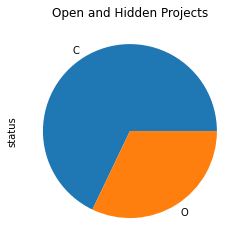

In [79]:
df.status.value_counts().plot.pie(title="Open and Hidden Projects")

## Get a Project Name 

You may wish to adjust the code below to set a project name of your choosing, for example 'My API Test Project'. In this sample, we'll just take the first project in the list.


In [80]:
sample_project_name = df.iloc[0]['name'] # First project in the list
sample_project_name

'Juni test project 3'

## Get ID of a Selected Project

Read ID of project 'Show & Tell 2021-Apr-30' from dataframe

In [81]:
stPrjID = df.loc[df['name'] == sample_project_name]
show_tell_prj = stPrjID['id'].values[0]
print('Project:', stPrjID['name'].values[0], 'ID:', show_tell_prj)

Project: Juni test project 3 ID: 5e013b69-d603-4f59-afee-ea2024392a28


## Read Task list from selected project

Use GET request from tasks API with selected project ID as input parameter.

Expected response "200 OK"

In [82]:
taskURL = base_url + '/api/calm-tasks/v1/tasks?projectId=' + show_tell_prj

response = requests.get(taskURL, headers=hed)

print(response.status_code, response.reason)

200 OK


### Parse project task list JSON into dataframe

In [83]:
df_stTasks = pd.json_normalize(response.json())

df_stTasks

,id,projectId,title,type,status,externalId,dueDate
0,067e1f6f-1bbd-43f7-96f1-be55c9bb826b,5e013b69-d603-4f59-afee-ea2024392a28,Review and Complete Requirements,CALMTMPL,CIPTKOPEN,None,2021-07-01
1,0fe3e334-b3f8-4732-8775-7e9453473a79,5e013b69-d603-4f59-afee-ea2024392a28,Confirm Scope and Requirements,CALMTMPL,CIPTKOPEN,None,2021-09-02
2,10db3d59-5804-4bdc-bb76-8a701ac3ad7f,5e013b69-d603-4f59-afee-ea2024392a28,Subtask of &#39;Setup project&#39;,CALMST,CIPTKOPEN,None,2021-08-10
3,12090cd1-da8c-4119-a81b-8217808e9c8a,5e013b69-d603-4f59-afee-ea2024392a28,User story1,CALMUS,CIPUSOPEN,None,2021-07-23
4,18273093-b19c-4aed-993f-045887ab9f1a,5e013b69-d603-4f59-afee-ea2024392a28,Setup Project,CALMTMPL,CIPTKCLOSE,None,2021-08-10
5,1b070666-0fa6-458a-9c8d-5bd1449e5c93,5e013b69-d603-4f59-afee-ea2024392a28,Task A,CALMTASK,CIPTKOPEN,None,2021-09-02
6,2a810cde-99d3-4220-886b-8f982ebe2dd4,5e013b69-d603-4f59-afee-ea2024392a28,Assign Landscape,CALMTMPL,CIPTKOPEN,None,2021-07-23
7,3c9071a6-b902-409d-97d3-1ce9d547844e,5e013b69-d603-4f59-afee-ea2024392a28,Setup Central Business Configuration Integrati...,CALMTMPL,CIPTKOPEN,None,2021-07-01
8,40d6d100-c349-4be1-bc9a-d6f24db45c31,5e013b69-d603-4f59-afee-ea2024392a28,Schedule Fit to Standard,CALMTMPL,CIPTKOPEN,None,None
9,420d97eb-0cf4-4fa4-856a-67cfa4775605,5e013b69-d603-4f59-afee-ea2024392a28,Sub task,CALMST,CIPTKOPEN,None,2021-07-09


### Barchart plot of tasks by status

Use built-in matplotlib of Pandas for quick data exploration

<AxesSubplot:title={'center':'Task Status'}>

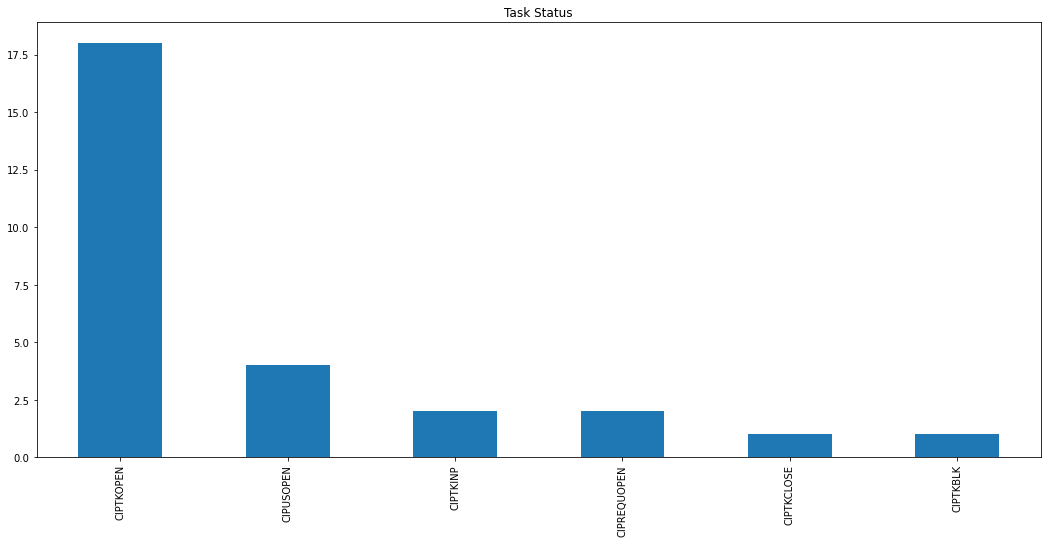

In [84]:
df_stTasks.status.value_counts().plot.bar(title="Task Status", figsize=(18,8))

### Analyze tasks by status and due date

Count tasks in each due date/status bin


In [85]:
df_stTasks_Status = df_stTasks.groupby(by=['status','dueDate'])['id'].count().reset_index()
df_stTasks_Status.rename(columns={'id': 'count'}, inplace=True)
df_stTasks_Status

,status,dueDate,count
0,CIPREQUOPEN,2021-07-01,1
1,CIPREQUOPEN,2021-09-02,1
2,CIPTKBLK,2021-07-23,1
3,CIPTKCLOSE,2021-08-10,1
4,CIPTKINP,2021-09-02,1
5,CIPTKINP,2022-04-09,1
6,CIPTKOPEN,2021-07-01,4
7,CIPTKOPEN,2021-07-09,1
8,CIPTKOPEN,2021-07-23,5
9,CIPTKOPEN,2021-08-10,3


### Demo stacked barchart due date, status count

Use plotly to make a quick stacked barchart. X-axis is due date, y axis is task count, colours in legend are task status values.

In [86]:
import plotly.express as px

fig = px.bar(df_stTasks_Status, x='dueDate', y='count', color='status', title="Task Status by Due Date", width=1200, height=800)
fig

## Create Task

* Endpoint: `https://<tenant url>/api/imp-tkm-srv/v1/tasks`

* Type: Post

Append a timestamp to the end of the new task title for easy identification in UI.

Expected response `201 Created`


In [87]:
import datetime

isoNow = datetime.datetime.now().isoformat()

taskCreateURL = base_url + '/api/calm-tasks/v1/tasks'

taskData = {
    "projectId": show_tell_prj,
    "title": "Notebook API test task " + isoNow,
    "type": "CALMTASK",
    "description": "test description. hello world"
}

response = requests.post(taskURL, headers=hed, json=taskData)

print(response.status_code, response.reason)

newTaskID = response.json()['id']
print("New task ID:", newTaskID)

201 Created
New task ID: 326e8417-1ba3-4b67-9237-764614f3a6e5


## Get Task Details

Use GET request to read details of task just created

* Endpoint: `https://<tenant url>/rest/tkm/v1/tasks/{taskGuid}`

* Type: Get

Expected response: `200 OK`


In [88]:
taskURL = base_url + '/api/calm-tasks/v1/tasks/' + newTaskID

response = requests.get(taskURL, headers=hed)

print(response.status_code, response.reason)

200 OK


### Save and print response JSON

In [89]:
taskToModify = response.json()
taskToModify

{'id': '326e8417-1ba3-4b67-9237-764614f3a6e5',
 'projectId': '5e013b69-d603-4f59-afee-ea2024392a28',
 'title': 'Notebook API test task 2021-07-16T10:32:45.917089',
 'type': 'CALMTASK',
 'status': 'CIPTKOPEN',
 'externalId': None,
 'dueDate': '2021-07-23',
 'description': 'test description. hello world'}

In [90]:
taskToModify['title']

'Notebook API test task 2021-07-16T10:32:45.917089'

## Modify Task

Use PATCH method to update task attributes

Expected response: `200 OK`

In [91]:
taskToModify['title'] = taskToModify['title'] + ' mod'
taskToModify['dueDate'] = '2022-04-09'
taskToModify['status'] = 'CIPTKINP'
taskToModify['description'] = 'This is a new <b>Descripion</b>. It replaces the old description'

In [92]:
taskURL = base_url + '/api/calm-tasks/v1/tasks/' + newTaskID

response = requests.patch(taskURL, headers=hed, json=taskToModify)

print(response.status_code, response.reason)

200 OK


In [93]:
response.json()

{'id': '326e8417-1ba3-4b67-9237-764614f3a6e5',
 'projectId': '5e013b69-d603-4f59-afee-ea2024392a28',
 'title': 'Notebook API test task 2021-07-16T10:32:45.917089 mod',
 'type': 'CALMTASK',
 'status': 'CIPTKINP',
 'externalId': None,
 'dueDate': '2022-04-09',
 'description': 'This is a new <b>Descripion</b>. It replaces the old description'}

## Delete Task

DELETE method

Expected response: `204 No Content`


In [94]:
taskURL = base_url + '/api/calm-tasks/v1/tasks/' + newTaskID

response = requests.delete(taskURL, headers=hed)

print(response.status_code, response.reason)

204 No Content


## Create Project

JSON format example for creating a project:

```
{
  "name": "string"
}
```

Expected response: `201 Created`

In [95]:
newProj = {
  "name": "Notebook API proj " + datetime.datetime.now().isoformat()
}

response = requests.post(base_url + '/api/calm-projects/v1/projects', headers=hed, json=newProj)

print(response.status_code, response.reason)

newProjID = response.json()['id']
print("New project ID:", newProjID)

201 Created
New project ID: fc2ac165-98e0-4eff-8767-692a30a1f568


### Add tasks to new project

**THIS WILL FAIL**

The failure demonstrates that task creation fails if this attempted as the first operation in a newly created project. (This is due to project ID buffering which needs to be updated for the new project, or a similar issue.)

* Run the code cell after this cell to reread the project list, and tasks from a project

Expected response on success: `201 Created`

On failure, which currenly is the case, you'll get a python runtime error, since the response JSON is empty.

In [98]:
taskCreateURL = base_url + '/api/calm-tasks/v1/tasks'

taskData = {
    "projectId": newProjID,
    "title": "Notebook API test task " + datetime.datetime.now().isoformat(),
    "type": "CALMTASK",
    "description": "test description. hello world"
}

response = requests.post(taskURL, headers=hed, json=taskData)

print(response.status_code, response.reason)

newTaskID = response.json()['id']
print("New task ID:", newTaskID)

201 Created
New task ID: debfc9c3-a13e-4f17-972a-a0d29fa58800


### Reread Project, tasks from project

Run this, then the above cell again if the create task operation in the above cell fails.

In [97]:


response = requests.get(base_url + '/api/calm-projects/v1/projects', headers=hed)

print(response.status_code, response.reason)


taskURL = base_url + '/api/calm-tasks/v1/tasks?projectId=' + newProjID

response = requests.get(taskURL, headers=hed)

print(response.status_code, response.reason)



200 OK
200 OK


### Create 10 tasks in project

Use tasks API to create multiple new tasks, by calling API in a for loop.

Expected response: 10 x `201 Created`

In [99]:
for i in range(10):
    print("Creating task", str(i))

    taskData = {
        "projectId": newProjID,
        "title": "Notebook API test task " + str(i),
        "type": "CALMTASK",
        "description": "test description. hello world"
    }

    response = requests.post(taskURL, headers=hed, json=taskData)

    print(response.status_code, response.reason)

    newTaskID = response.json()['id']
    print("New task ID:", newTaskID)



Creating task 0
201 Created
New task ID: 78b3d81d-3d40-494e-91ee-50aea0d556a1
Creating task 1
201 Created
New task ID: e14b684a-7b96-4b8c-baab-bc2b93360c50
Creating task 2
201 Created
New task ID: 331f9857-2522-4ca4-a585-055e10165cad
Creating task 3
201 Created
New task ID: 1fb336f6-a84b-49c5-8ed2-51e2a5a5fa92
Creating task 4
201 Created
New task ID: 79362ca9-f050-424b-b04b-0cee1a352ddf
Creating task 5
201 Created
New task ID: 9d9f0d45-d6b3-4a96-a3f4-62d60b74772b
Creating task 6
201 Created
New task ID: 49595caa-2daf-48ab-8d99-38ed28329a3c
Creating task 7
201 Created
New task ID: 8a96ee8e-498c-4962-9d68-a2924c32bfac
Creating task 8
201 Created
New task ID: 216546e1-5322-4f13-bf61-e299faf6233a
Creating task 9
201 Created
New task ID: f83766ab-0bfc-4d88-a319-1e62ee2432e9


### Create 10 user stories in project

Change type parameter to 'CALMUS' to have the API create user stories instead of tasks.

Expected response: 10 x `201 Created`

In [100]:
for i in range(10):
    print("Creating user story", str(i))

    taskData = {
        "projectId": newProjID,
        "title": "Gordon API test user story " + str(i),
        "type": "CALMUS",
        "description": "test description. <b>hello world</b>"
    }

    response = requests.post(taskURL, headers=hed, json=taskData)

    print(response.status_code, response.reason)

    newTaskID = response.json()['id']
    print("New task ID:", newTaskID)

Creating user story 0
201 Created
New task ID: 5f09ea32-6b8a-4947-b72f-15039d8ff42a
Creating user story 1
201 Created
New task ID: 8f227572-b55c-4f00-ac7d-7d5d66e42077
Creating user story 2
201 Created
New task ID: d063518b-053c-415e-9ae1-8be498af3619
Creating user story 3
201 Created
New task ID: f7988d38-6521-4422-9f38-fa63e6460bf0
Creating user story 4
201 Created
New task ID: 52986207-8d30-43e7-8073-f4b7d5393cd7
Creating user story 5
201 Created
New task ID: 4a80dc25-68c8-423a-8f37-f806df471182
Creating user story 6
201 Created
New task ID: 0c82ff15-4df6-4f05-b092-3f2f68dd2229
Creating user story 7
201 Created
New task ID: ef8b0a6c-0980-41ca-9e7e-3f1c3ad1bd08
Creating user story 8
201 Created
New task ID: 2a91a147-610f-43d6-bc17-521a682463b3
Creating user story 9
201 Created
New task ID: 0b2ef042-d18c-43f7-91b9-f0c2b7565c7a
